In [1]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from matplotlib import pyplot as plt
from sklearn import preprocessing
import numpy as np
import pandas as pd

# Agrisolus
# Previsão de Pesagem

In [2]:
ag = pd.read_csv("agrisolus_ml_dias/agrisolus.csv", sep=';')

In [3]:
ag.drop('Unnamed: 0', axis=1,inplace=True)
ag.columns

Index(['Data', 'Peso', 'Umidade', 'Temperatura', 'idLote', 'idLinhagem',
       'idBalanca', 'DataAlojamento', 'Sexo', 'PesoChegada', 'DataAbate',
       'Idade', 'idPesoEsperado', 'PesoEsperado', 'DiffPeso'],
      dtype='object')

### Remove linhas que apresentem pesagem com 25% acima do esperado e 25% abaixo do esperado (Pesagem parcial ou múltipla de frangos)

In [4]:
ag = ag[((ag.Peso>=ag.PesoEsperado*0.75)&(ag.Peso<=ag.PesoEsperado*1.25))]

### Remove linhas que apresentem Umidade e Temperatura iguais a 0

In [5]:
ag = ag[(ag.Umidade!=0.0)&(ag.Temperatura!=0.0)]

### Encode categorical feature Sexo

In [6]:
le = preprocessing.LabelEncoder()
ag.loc[:,'Sexo']=le.fit_transform(ag.Sexo)
list(le.inverse_transform([0,1]))

['Fêmeas Cobb MV GT Foods', 'Mistos Cobb MV GT Foods']

### Média de pesagem do dia, por sexo

In [7]:
for idade in list(ag.Idade.unique()):
    print("Idade: ",idade)
    print(ag.loc[ag["Idade"]==idade].groupby('Sexo')['Peso'].mean())
    print("----------------------------------------")

Idade:  0
Sexo
0    43.417800
1    42.564918
Name: Peso, dtype: float64
----------------------------------------
Idade:  1
Sexo
0    61.693781
1    62.956011
Name: Peso, dtype: float64
----------------------------------------
Idade:  2
Sexo
0    73.097938
1    73.575473
Name: Peso, dtype: float64
----------------------------------------
Idade:  3
Sexo
0    89.830918
1    90.469074
Name: Peso, dtype: float64
----------------------------------------
Idade:  4
Sexo
0    110.733690
1    109.904573
Name: Peso, dtype: float64
----------------------------------------
Idade:  5
Sexo
0    130.911976
1    134.384541
Name: Peso, dtype: float64
----------------------------------------
Idade:  6
Sexo
0    161.842618
1    162.478048
Name: Peso, dtype: float64
----------------------------------------
Idade:  7
Sexo
0    180.333731
1    188.137242
Name: Peso, dtype: float64
----------------------------------------
Idade:  8
Sexo
0    220.778851
1    223.234948
Name: Peso, dtype: float64
--------------

In [8]:
PesoFemea = []
PesoMisto = []
Umidade = []
Temperatura = []
for idade in list(ag.Idade.unique()):
    PesoFemea.append(ag.loc[(ag["Idade"]==idade)&(ag["Sexo"]==0)]['Peso'].mean())
    PesoMisto.append(ag.loc[(ag["Idade"]==idade)&(ag["Sexo"]==1)]['Peso'].mean())
    Umidade.append(ag.loc[(ag["Idade"]==idade)]['Umidade'].mean())
    Temperatura.append(ag.loc[(ag["Idade"]==idade)]['Temperatura'].mean())

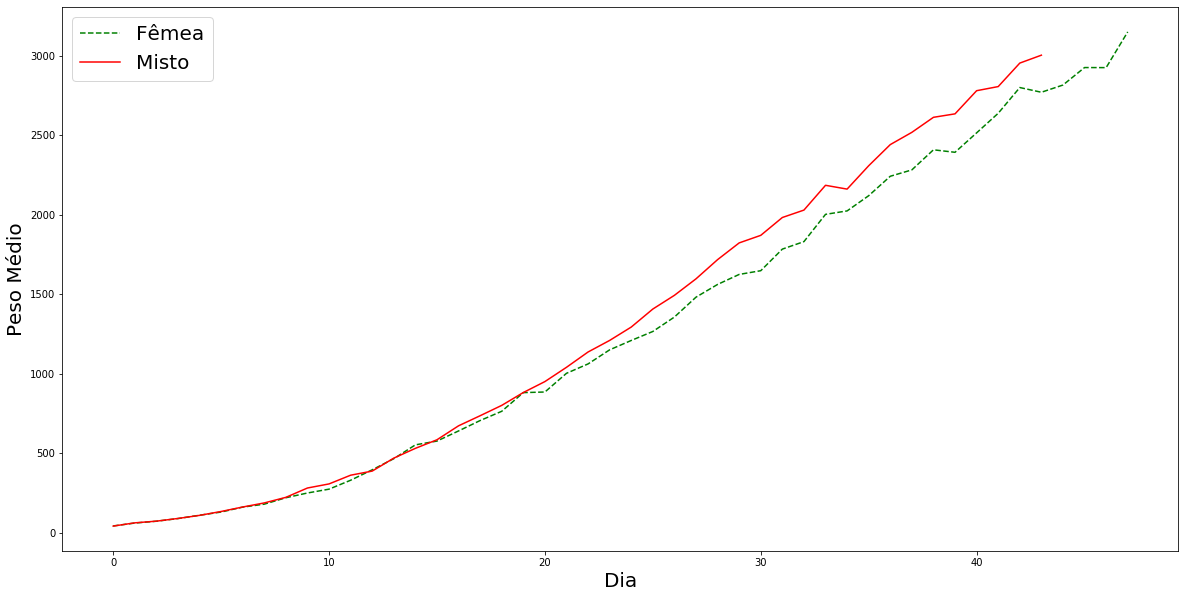

In [9]:
X = list(ag.Idade.unique())
YF = PesoFemea
YM = PesoMisto

plt.figure(figsize = (20,10))
plt.plot(X,YF,color='g',linestyle='--',label="Fêmea")
plt.plot(X, YM,color='r',label="Misto")
plt.xlabel('Dia', fontsize=20)
plt.ylabel('Peso Médio', fontsize=20)
plt.legend(fontsize=20)

### Média de umidade e temperatura do dia

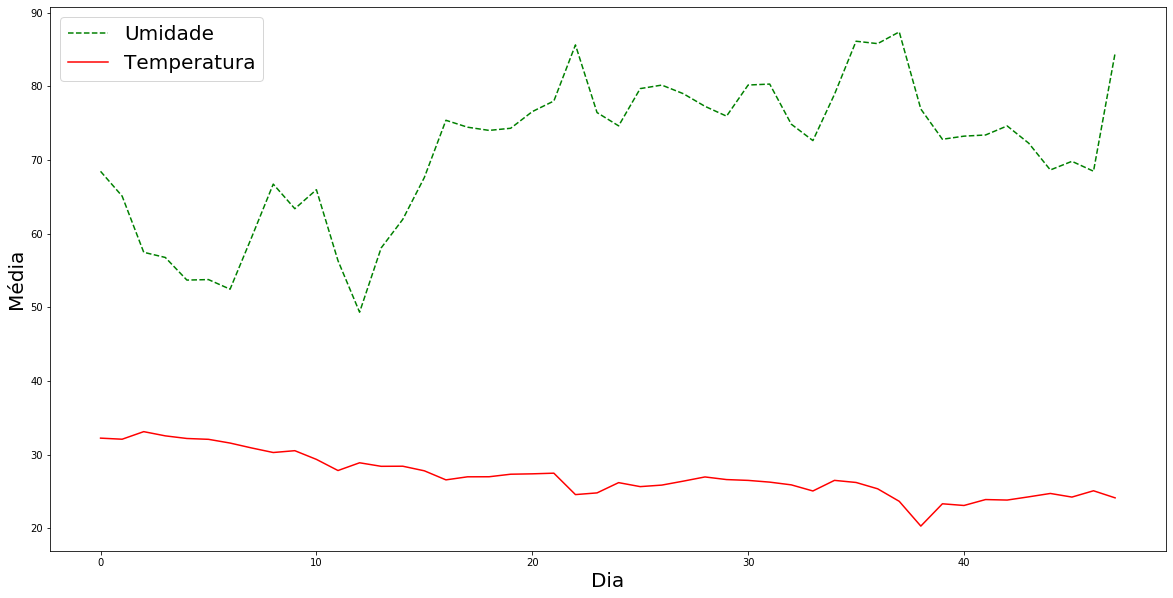

In [10]:
X = list(ag.Idade.unique())
U = Umidade
T = Temperatura

plt.figure(figsize = (20,10))
plt.plot(X,U,color='g',linestyle='--',label="Umidade")
plt.plot(X, T,color='r',label="Temperatura")
plt.xlabel('Dia', fontsize=20)
plt.ylabel('Média', fontsize=20)
plt.legend(fontsize=20)

# Análise por Linhagem

### Funções

In [11]:
# RSS e R²
def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())
    
def calc_r2(y,predicted):
    return r2_score(predicted,y)

#-----------------------------------------------

# Cálculo de RSS e R² para cada Modelo

K = 2
knn_method = "distance"
def calc_rss_r2(model_name, X_train, Y_train, X_test, Y_test):
    
    if model_name == "linear":
        reg = LinearRegression().fit(X_train,Y_train)
    elif model_name == "knn":
        reg = KNeighborsRegressor(n_neighbors=K,weights=knn_method).fit(X_train,Y_train)
    elif model_name == "tree":
        reg = DecisionTreeRegressor().fit(X_train, Y_train)
    
    pred_train = reg.predict(X_train)
    pred_test = reg.predict(X_test)
        
    rss_train = calc_rss(Y_train,pred_train)
    r2_train = calc_r2(Y_train,pred_train)
    rss_test = calc_rss(Y_test,pred_test)
    r2_test = calc_r2(Y_test,pred_test)
    
    return (rss_train, r2_train, rss_test, r2_test)

#-----------------------------------------------

# Impressão de Resultados

def print_rss_r2 (model, results):
    if model == "linear":
        print("     LINEAR REGRESSION")
    elif model == "knn":
        print("         KNN K = 2")
    elif model == "tree":
        print("         TREE")  
    print("Train\n  RSS = ",results[0],"\n  R² = ",results[1])
    print("Test\n  RSS = ",results[2],"\n  R² = ",results[3])

### Sample aleatório da base de dados

In [12]:
ag = ag.sample(n=50000)

### Filtragem idade e linhagem

In [13]:
ag15 = ag[(ag.idLinhagem==15)&(ag.Idade>15)]
ag16 = ag[(ag.idLinhagem==16)&(ag.Idade>15)]

In [14]:
ag15.head()

,Data,Peso,Umidade,Temperatura,idLote,idLinhagem,idBalanca,DataAlojamento,Sexo,PesoChegada,DataAbate,Idade,idPesoEsperado,PesoEsperado,DiffPeso
1980746,2019-05-20 05:25:50,2780.8721,79.8,21.6,2,15,2861839,2019-04-06 06:30:00,0,38.0,2019-05-25 09:30:00,43,1378,2843.0,-62.1279
2043547,2019-05-22 15:19:28,3191.5724,61.4,27.3,2,15,2861839,2019-04-06 06:30:00,0,38.0,2019-05-25 09:30:00,46,1381,3094.0,97.5724
2061143,2019-05-23 09:23:08,2871.4274,83.7,23.9,2,15,2861839,2019-04-06 06:30:00,0,38.0,2019-05-25 09:30:00,47,1382,3177.0,-305.5726
2000423,2019-05-21 01:25:49,2357.0611,71.8,22.6,2,15,2861839,2019-04-06 06:30:00,0,38.0,2019-05-25 09:30:00,44,1379,2927.0,-569.9389
2042841,2019-05-22 14:39:52,2525.6708,66.3,26.9,2,15,2861839,2019-04-06 06:30:00,0,38.0,2019-05-25 09:30:00,46,1381,3094.0,-568.3292


In [15]:
ag16.head()

,Data,Peso,Umidade,Temperatura,idLote,idLinhagem,idBalanca,DataAlojamento,Sexo,PesoChegada,DataAbate,Idade,idPesoEsperado,PesoEsperado,DiffPeso
1680945,2019-05-13 04:15:58,2798.3273,84.4,23.6,1,16,2843680,2019-04-06 06:30:00,1,38.0,2019-05-20 02:00:00,36,1435,2369.0,429.3273
1168898,2019-05-02 01:24:59,1477.2097,92.8,21.5,1,16,2843680,2019-04-06 06:30:00,1,38.0,2019-05-20 02:00:00,25,1424,1349.0,128.2097
942565,2019-04-27 10:44:15,1082.2387,81.2,29.2,1,16,2848352,2019-04-06 06:30:00,1,38.0,2019-05-20 02:00:00,21,1420,1018.0,64.2387
1821735,2019-05-16 14:14:43,2844.7472,66.5,26.6,1,16,2848352,2019-04-06 06:30:00,1,38.0,2019-05-20 02:00:00,40,1439,2758.0,86.7472
759383,2019-04-22 23:09:15,691.6182,80.4,24.8,1,16,2843680,2019-04-06 06:30:00,1,38.0,2019-05-20 02:00:00,16,1415,654.0,37.6182


### Linhagem 15

In [16]:
X_1 = ag15.loc[:,['Idade','Umidade']]
X_2 = ag15.loc[:,['Idade','Temperatura']]
X_3 = ag15.loc[:,['Idade','Umidade','Temperatura']]

Y = ag15.loc[:,['Peso']]
Y = Y.Peso/Y.Peso.max()

linear = LinearRegression()

In [17]:
# Idade e Umidade
print("    ** IDADE e UMIDADE **\n")
X_train, X_test, y_train, y_test = train_test_split(X_1, Y, test_size=0.15, shuffle=True)
rss_r2 = calc_rss_r2("linear", X_train, y_train, X_test, y_test)
print_rss_r2 ("linear", rss_r2)
print("---------------------------------")
rss_r2 = calc_rss_r2("knn", X_train, y_train, X_test, y_test)
print_rss_r2 ("knn", rss_r2)
print("---------------------------------")
rss_r2 = calc_rss_r2("tree", X_train, y_train, X_test, y_test)
print_rss_r2 ("tree", rss_r2)

    ** IDADE e UMIDADE **

     LINEAR REGRESSION
Train
  RSS =  50.29284289862658 
  R² =  0.8559029587534289
Test
  RSS =  8.775280004538459 
  R² =  0.8547428601503961
---------------------------------
         KNN K = 2
Train
  RSS =  37.40939081124668 
  R² =  0.9013477998459523
Test
  RSS =  10.305512761578814 
  R² =  0.8448670434870935
---------------------------------
         TREE
Train
  RSS =  27.51668765061539 
  R² =  0.9259899834701645
Test
  RSS =  8.849591964363803 
  R² =  0.8639875393105239


In [18]:
# Idade e Temperatura
print("    ** IDADE e TEMPERATURA **\n")
X_train, X_test, y_train, y_test = train_test_split(X_2, Y, test_size=0.15, shuffle=True)
rss_r2 = calc_rss_r2("linear", X_train, y_train, X_test, y_test)
print_rss_r2 ("linear", rss_r2)
print("---------------------------------")
rss_r2 = calc_rss_r2("knn", X_train, y_train, X_test, y_test)
print_rss_r2 ("knn", rss_r2)
print("---------------------------------")
rss_r2 = calc_rss_r2("tree", X_train, y_train, X_test, y_test)
print_rss_r2 ("tree", rss_r2)

    ** IDADE e TEMPERATURA **

     LINEAR REGRESSION
Train
  RSS =  50.24470497286349 
  R² =  0.8567281371653601
Test
  RSS =  8.86851620767915 
  R² =  0.8534656749579173
---------------------------------
         KNN K = 2
Train
  RSS =  51.55387964518151 
  R² =  0.8668913841465704
Test
  RSS =  11.183896562551068 
  R² =  0.8346189286567182
---------------------------------
         TREE
Train
  RSS =  33.826130434283144 
  R² =  0.9078591851061496
Test
  RSS =  7.944502490146282 
  R² =  0.8744684925748846


In [19]:
# Idade, Umidade e Temperatura
print("    ** IDADE , UMIDADE e TEMPERATURA **\n")
X_train, X_test, y_train, y_test = train_test_split(X_3, Y, test_size=0.15, shuffle=True)
rss_r2 = calc_rss_r2("linear", X_train, y_train, X_test, y_test)
print_rss_r2 ("linear", rss_r2)
print("---------------------------------")
rss_r2 = calc_rss_r2("knn", X_train, y_train, X_test, y_test)
print_rss_r2 ("knn", rss_r2)
print("---------------------------------")
rss_r2 = calc_rss_r2("tree", X_train, y_train, X_test, y_test)
print_rss_r2 ("tree", rss_r2)

    ** IDADE , UMIDADE e TEMPERATURA **

     LINEAR REGRESSION
Train
  RSS =  49.94639071812903 
  R² =  0.8572057994627589
Test
  RSS =  9.056883773760923 
  R² =  0.8528610234562937
---------------------------------
         KNN K = 2
Train
  RSS =  9.80619039065849 
  R² =  0.974937966874722
Test
  RSS =  7.287274581878556 
  R² =  0.8914662662586167
---------------------------------
         TREE
Train
  RSS =  7.899181060518493 
  R² =  0.9798400822482453
Test
  RSS =  8.839995834746915 
  R² =  0.8712081622757863


### Linhagem 16

In [20]:
X_1 = ag16.loc[:,['Idade','Umidade']]
X_2 = ag16.loc[:,['Idade','Temperatura']]
X_3 = ag16.loc[:,['Idade','Umidade','Temperatura']]

Y = ag16.loc[:,['Peso']]
Y = Y.Peso/Y.Peso.max()

In [21]:
# Idade e Umidade
print("    ** IDADE e UMIDADE **\n")
X_train, X_test, y_train, y_test = train_test_split(X_1, Y, test_size=0.15, shuffle=True)
rss_r2 = calc_rss_r2("linear", X_train, y_train, X_test, y_test)
print_rss_r2 ("linear", rss_r2)
print("---------------------------------")
rss_r2 = calc_rss_r2("knn", X_train, y_train, X_test, y_test)
print_rss_r2 ("knn", rss_r2)
print("---------------------------------")
rss_r2 = calc_rss_r2("tree", X_train, y_train, X_test, y_test)
print_rss_r2 ("tree", rss_r2)

    ** IDADE e UMIDADE **

     LINEAR REGRESSION
Train
  RSS =  93.71756887175007 
  R² =  0.8176859399792875
Test
  RSS =  16.156872859204142 
  R² =  0.8319557657261141
---------------------------------
         KNN K = 2
Train
  RSS =  84.84772339308176 
  R² =  0.8530073602678729
Test
  RSS =  20.31346105907553 
  R² =  0.8099066959590364
---------------------------------
         TREE
Train
  RSS =  61.59171509057549 
  R² =  0.8872298785568316
Test
  RSS =  16.607497440231597 
  R² =  0.8384033165981959


In [22]:
# Idade e Temperatura
print("    ** IDADE e TEMPERATURA **\n")
X_train, X_test, y_train, y_test = train_test_split(X_2, Y, test_size=0.15, shuffle=True)
rss_r2 = calc_rss_r2("linear", X_train, y_train, X_test, y_test)
print_rss_r2 ("linear", rss_r2)
print("---------------------------------")
rss_r2 = calc_rss_r2("knn", X_train, y_train, X_test, y_test)
print_rss_r2 ("knn", rss_r2)
print("---------------------------------")
rss_r2 = calc_rss_r2("tree", X_train, y_train, X_test, y_test)
print_rss_r2 ("tree", rss_r2)

    ** IDADE e TEMPERATURA **

     LINEAR REGRESSION
Train
  RSS =  92.87989891068813 
  R² =  0.8215462937367067
Test
  RSS =  16.371196572290856 
  R² =  0.8225444256449761
---------------------------------
         KNN K = 2
Train
  RSS =  94.57621043413616 
  R² =  0.8318958259998925
Test
  RSS =  19.178739557227054 
  R² =  0.8091080515353185
---------------------------------
         TREE
Train
  RSS =  66.62440428531221 
  R² =  0.8781393263387484
Test
  RSS =  14.381304511406697 
  R² =  0.8514925506807058


In [23]:
# Idade, Umidade e Temperatura
print("    ** IDADE , UMIDADE e TEMPERATURA **\n")
X_train, X_test, y_train, y_test = train_test_split(X_3, Y, test_size=0.15, shuffle=True)
rss_r2 = calc_rss_r2("linear", X_train, y_train, X_test, y_test)
print_rss_r2 ("linear", rss_r2)
print("---------------------------------")
rss_r2 = calc_rss_r2("knn", X_train, y_train, X_test, y_test)
print_rss_r2 ("knn", rss_r2)
print("---------------------------------")
rss_r2 = calc_rss_r2("tree", X_train, y_train, X_test, y_test)
print_rss_r2 ("tree", rss_r2)

    ** IDADE , UMIDADE e TEMPERATURA **

     LINEAR REGRESSION
Train
  RSS =  93.2589239419757 
  R² =  0.8198372027829662
Test
  RSS =  15.999010212727445 
  R² =  0.8265725494967411
---------------------------------
         KNN K = 2
Train
  RSS =  16.21903750737789 
  R² =  0.973008056346599
Test
  RSS =  14.156065192276925 
  R² =  0.868774127216122
---------------------------------
         TREE
Train
  RSS =  13.381718216821051 
  R² =  0.9776043501147982
Test
  RSS =  15.796142613583017 
  R² =  0.8577097513388765
